## 1. Linear regression with least squares

In this exercise we are going to implement the matrix form of linear regression using the least squares method. 

To do this, you will have to:

- Explore a dataset
- Implement linear regression
- Apply it to a specific dataset

As a reminder, the values ​​of the weights $\widehat{w}$ are given by:

$\widehat{w} = (X^T X)^{-1}X^T y,$

Where $y$ is the variable to predict and $X$ is the feature matrix _(NOTE: check how it is defined in the notes)_. 

We know that the weights are going to be the parameters of the linear equation that we are trying to fit and we will have one for each input variable that we use and also an independent term or bias.

### 1.1 Loading the dataset and exploring data exploratory data analysis (EDA) 

We are going to use the [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset that we can find in the [UC Irvine Machine Learning repository](https://archive.ics.uci.edu/). First, let's familiarize ourselves with the data.

The repository itself tells us how to download the dataset with its library (we can consult the source code if we want).

In [362]:
!pip install ucimlrepo

In [376]:
from ucimlrepo import fetch_ucirepo 
  
# check which datasets can be imported
# list_available_datasets()

# fetch dataset by id or name (e.g.: name = 'Auto MPG', id = 9) # miles per gallon
data_set = fetch_ucirepo(id=9) # 45 is heart diseases
  
# data (as pandas dataframes) 
X = data_set.data.features
y = data_set.data.targets 

With the Pandas `head` function we can see the first 5 rows of the dataset.

In [377]:
# 'X' contains rows as data samples and columns as features.
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [378]:
# 'y' is the dependent variable, the variable to predict
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [379]:
from IPython.display import display

# metadata
display(data_set.metadata)

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [381]:
# variable information
display(data_set.variables)

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [382]:
# dataframe consisting of all ids, features, and targets
display(data_set.data.original)


,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [383]:
# X.shape returns a tuple with num_rows or datapoints and num_columns or variables in the dataset.
print(X.shape)

(398, 7)


In [384]:
print(y.shape)

(398, 1)


In [371]:
# data types and missing values
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
None


In [372]:
# summary statistics
display(X.describe())  

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

Next, create a function where you pass the feature and target DataFrames, as well as the name of the variable (feature), and it plots the target (fuel consumption in miles per gallon) against the specified variable. You can refer to the example graph below, but feel free to use your own parameters for the color of the points, grid, etc

In [386]:
y.head().info()
first_column_name = y.columns[0]
print("\nFirst column name:", first_column_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     5 non-null      float64
dtypes: float64(1)
memory usage: 172.0 bytes

First column name: mpg


In [387]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = X
column_name = 'horsepower'

column_name_rows = X.shape[0]
print(type(df))
print(X.shape)
print("Number of instances:", column_name_rows)

<class 'pandas.core.frame.DataFrame'>
(398, 7)
Number of instances: 398


In [398]:

# put together the X column_name and y, and convert it to DataFrame
df_x_y = pd.DataFrame(np.hstack((df[[column_name]], y)), columns=['X', 'y'])

# clean rows with NaN in X
df_cleaned = df_x_y.dropna(subset='X')

# number of rows in X
num_rows = df_cleaned.shape[0]

# extract the cleaned X and add a column of 1s for the bias term
X_clean = np.c_[np.ones(num_rows), df_cleaned[['X']]]

# extract the cleaned y
y_clean = df_cleaned[['y']]

# calculate W using the Equation #W=(X^{T}X)^{-1}X^{T}y
X_t = X_clean.T
W = np.linalg.inv(X_t @ X_clean) @ X_t @ y_clean

# Output the weights
print("Weights (W):", W)

Weights (W):            y
0  39.935861
1  -0.157845


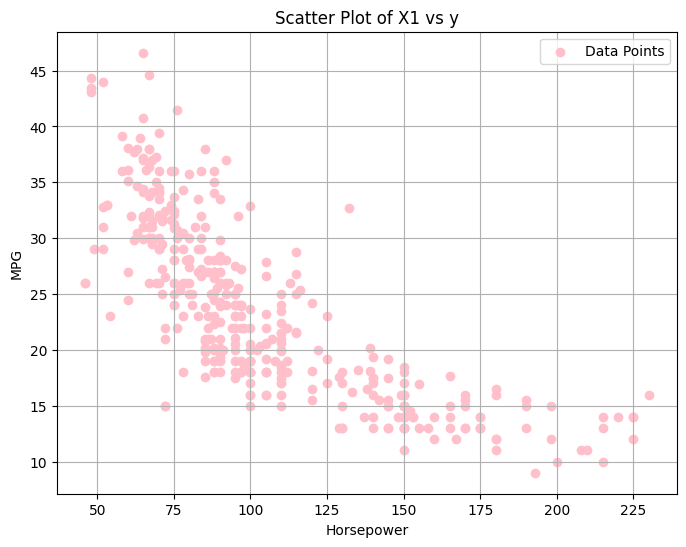

In [389]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['X'], df_cleaned['y'], color='pink', label='Data Points')
plt.title("Scatter Plot of X1 vs y")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.grid(True)
plt.show()

In [403]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize(df, y, column_name):
    # put together the X column_name and y, and convert it to DataFrame
    df_x_y = pd.DataFrame(np.hstack((df[[column_name]], y)), columns=['X', 'y'])

    # clean rows with NaN in X
    df_cleaned = df_x_y.dropna(subset='X')

    # number of rows in X
    num_rows = df_cleaned.shape[0]
    print(num_rows)

    # extract the cleaned X and add a column of 1s for the bias term
    # # X_clean = np.c_[np.ones(num_rows), df_cleaned[['X']]]
    # X_clean = np.hstack((np.ones(num_rows), df_cleaned[['X']]))
    # print(X_clean)

    # # extract the cleaned y
    # y_clean = df_cleaned[['y']]

    # # calculate W using the Equation #W=(X^{T}X)^{-1}X^{T}y
    # X_t = X_clean.T
    # W = np.linalg.inv(X_t @ X_clean) @ X_t @ y_clean
    
    # # Output the weights
    # print("Weights (W):", W)
    # return W

    # draw the graph
    # to see how that least squares adjustment looks.
    # plt.figure(figsize=(8, 6))
    # plt.scatter(df_cleaned['X'], df_cleaned['y'], color='orange', label='Data Points')
    # plt.title("Scatter Plot of X1 vs y")
    # plt.xlabel(column_name)
    # plt.ylabel(y.columns[0])
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    

In [404]:
visualize(X, y, 'horsepower')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
visualiza(X, y, 'acceleration')

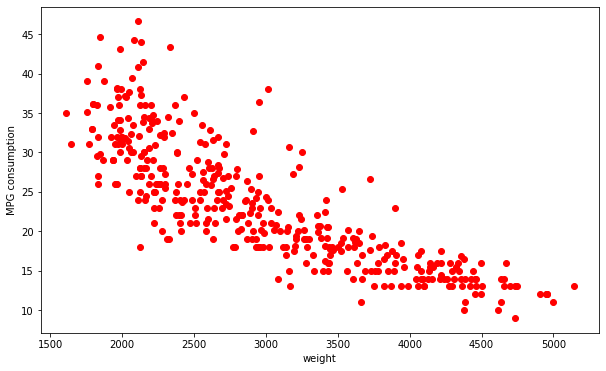

In [33]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [32]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    

    # TODO 3 Calcula los pesos

    return w

In [ ]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos



Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

